In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("../data/train.csv")
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
from typing import List

def normalize_dataframe(df, skipped: List[str] | str):
    if isinstance(skipped, str):
        skipped = [skipped]
    num_df = df.select_dtypes(include=["int64", "float64"]).drop(skipped, axis=1)
    cat_df = df.select_dtypes(exclude=["int64", "float64"])
    num_df = (num_df - num_df.mean()) / num_df.std()
    norm_df = pd.concat([cat_df, num_df, df[skipped]], axis=1)
    return norm_df

In [5]:
num_df = df.select_dtypes(include=["int64", "float64"])
cat_df = df.select_dtypes(exclude=["int64", "float64"])
num_df = (num_df - num_df.mean()) / num_df.std()
norm_df = pd.concat([cat_df, num_df], axis=1)
norm_df.head()
# (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-1.731926,0.105696,-0.002828,-0.235707,-0.836259,0.314676,1.206565,-1.171113,0.597424
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight,-1.731759,-1.027027,-1.606252,-1.170903,-0.836259,0.338356,-0.048348,0.021774,0.636498
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight,-1.731592,-1.027027,0.128448,-1.429978,-1.060306,-1.913377,-0.195640,-0.138019,1.755197
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-1.731425,-0.507917,0.120087,1.644731,1.039146,0.338356,-0.584021,0.579882,0.271448
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-1.731258,1.371163,2.450308,0.224049,0.438386,-1.119774,-0.081467,1.176457,0.523099


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

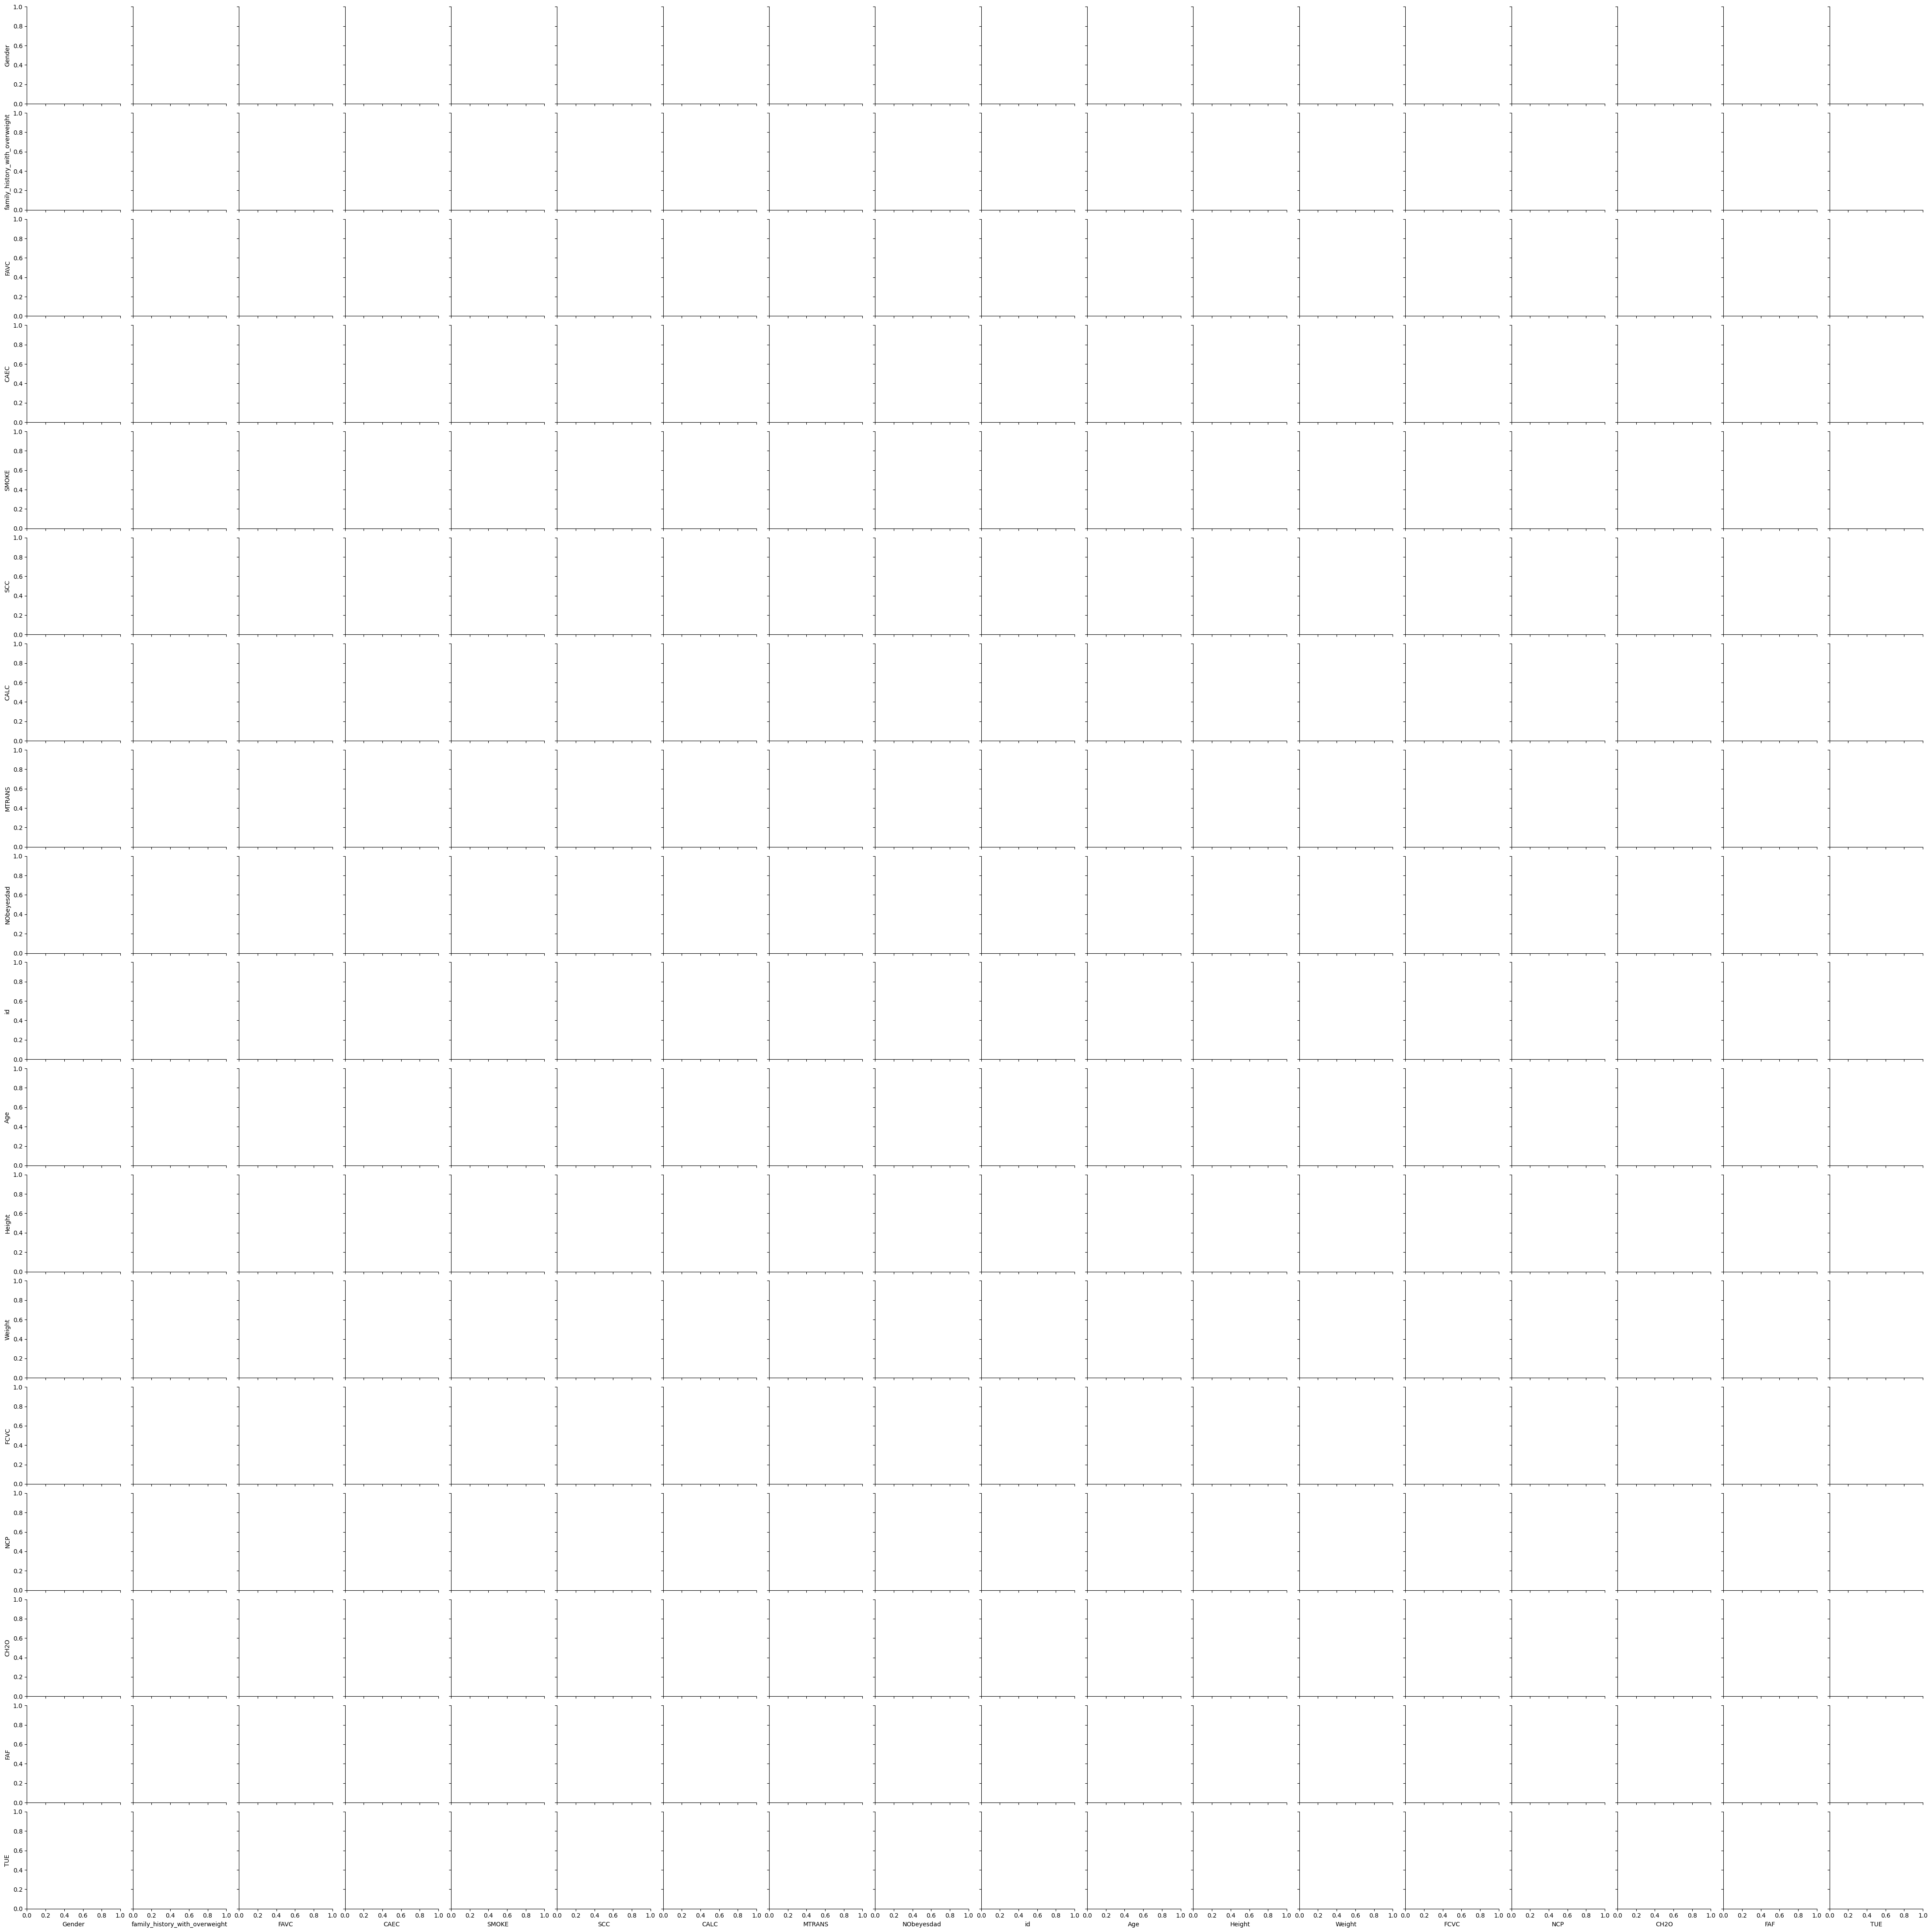

In [7]:
sns.pairplot(norm_df, vars=norm_df.columns.to_list(), plot_kws={ "alpha": 0.5 }, hue="NObeyesdad")

## H2o

In [5]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_382"; OpenJDK Runtime Environment (build 1.8.0_382-b05); OpenJDK 64-Bit Server VM (build 25.382-b05, mixed mode)
  Starting server from /home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprde7kgot
  JVM stdout: /tmp/tmprde7kgot/h2o_dondon_started_from_python.out
  JVM stderr: /tmp/tmprde7kgot/h2o_dondon_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 25 days
H2O_cluster_name:,H2O_from_python_dondon_yxi49c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.92 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

frame = norm_df.drop("id", axis=1)
y = "NObeyesdad"
x_cols = frame.drop([y, "CALC"], axis=1).columns.to_list()

frame = h2o.H2OFrame(norm_df)
# train, valid = frame.split_frame(ratios=[0.8], seed=717)
if 
aml = H2OAutoML(max_models=20, max_runtime_secs=(60 * 120), nfolds=5, keep_cross_validation_predictions=True, seed=717)
# aml.train(x=x_cols, y=y, training_frame=train)
aml.train(x=x_cols, y=y, training_frame=frame)
aml.leader.to

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
13:49:12.786: GLM_1_AutoML_1_20240215_134849 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: 29

█████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),19/20
# GBM base models (used / total),6/7
# XGBoost base models (used / total),7/7
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),4/4
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [28]:
test_df = pd.read_csv("../data/test.csv")
norm_test_df = normalize_dataframe(test_df, skipped="id")
test_h2o_df = h2o.H2OFrame(norm_test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
y_pred = aml.predict(test_h2o_df)
y_pred

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


/home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'CALC' has levels not trained on: ["Always"]
  warnings.warn(w)


predict,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Obesity_Type_II,0.000130066,2.69665e-05,0.00104752,0.998322,0.000192903,0.00013707,0.000143856
Overweight_Level_I,0.000218342,0.00218892,0.00393639,0.000220842,0.000100832,0.987248,0.00608638
Obesity_Type_III,5.57483e-05,3.37434e-06,0.000407864,3.71974e-05,0.999458,1.81209e-05,1.99226e-05
Obesity_Type_I,0.000131066,6.02666e-05,0.97661,0.0193877,0.00176832,0.00056051,0.00148261
Obesity_Type_III,8.58914e-05,8.15999e-06,0.00223484,4.68023e-05,0.997526,4.08502e-05,5.73627e-05
Insufficient_Weight,0.997676,0.000981129,0.000189475,9.23524e-05,8.88015e-05,0.000843609,0.00012874
Insufficient_Weight,0.991586,0.00188569,0.000789802,0.000195243,0.000156834,0.00492294,0.00046398
Overweight_Level_I,0.0107031,0.200895,0.0353866,0.00182538,0.000360788,0.609394,0.141435
Overweight_Level_II,0.00241502,0.00341359,0.00715739,0.000893064,0.000335961,0.0401215,0.945663
Normal_Weight,0.116923,0.759664,0.00291328,0.000736306,0.000712667,0.111203,0.00784673


In [30]:
res = test_h2o_df.as_data_frame()
res[y] = y_pred.as_data_frame()["predict"]
res[["id", y]].to_csv("../data/predictions.csv", index=False)

/home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [22]:
# aml.get_best_model(algorithm="xgboost")
xgboost_y_pred = aml.get_best_model(algorithm="xgboost").predict(test_h2o_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'CALC' has levels not trained on: ["Always"]
  warnings.warn(w)


In [ ]:
xgboost_y_pred

predict,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Obesity_Type_II,0.00311243,0.00010599,0.0203626,0.956347,0.0171275,0.000730902,0.00221408
Obesity_Type_III,0.000141601,4.19756e-05,0.00319461,0.000751327,0.99485,0.000244011,0.000776186
Obesity_Type_III,0.000809421,2.37344e-05,0.0011648,0.000334795,0.996517,0.000188366,0.000961984
Obesity_Type_II,0.00160502,0.000180388,0.013641,0.94705,0.0318479,0.00113214,0.00454323
Obesity_Type_III,0.00533494,0.000171267,0.00685285,0.00534746,0.972954,0.00156186,0.00777744
Obesity_Type_I,0.0461764,0.00173173,0.724768,0.208463,0.00868459,0.00376512,0.00641113
Obesity_Type_II,0.0166303,0.000230198,0.0266453,0.926228,0.0235094,0.00239805,0.00435866
Obesity_Type_I,0.0360178,0.00301441,0.753712,0.174809,0.0162143,0.0079269,0.00830607
Obesity_Type_II,0.00622658,0.000187235,0.00184861,0.982383,0.00608547,0.000552087,0.00271746
Obesity_Type_III,0.00113963,0.000300762,0.0126425,0.00408287,0.969742,0.00421385,0.00787812


In [ ]:
res = test.as_data_frame()
res[y] = xgboost_y_pred.as_data_frame()["predict"]
res[["id", y]].to_csv("../data/xgboost_predictions.csv", index=False)

/home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/home/dondon/.local/share/hatch/env/virtual/obesity-risk/g1Q1rl5i/obesity-risk/lib/python3.11/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
